<a href="https://colab.research.google.com/github/vinotha312005-ops/R-shiny-/blob/main/1_Customer_Churn_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**INTRODUCTION**

Customer churn refers to the situation where customers stop using a company’s products or services. In today’s competitive business environment, retaining existing customers is as important as acquiring new ones. Organizations generate large volumes of customer data, but manually analyzing this data to identify potential churn customers is difficult and time-consuming. Machine learning techniques provide an effective solution by automatically analyzing customer behavior patterns and predicting whether a customer is likely to leave the service. This project focuses on building an intelligent customer churn prediction system using machine learning models to help businesses improve customer retention and reduce revenue loss.

**OBJECTIVE**

The main objective of this project is to develop a machine learning model that can accurately predict customer churn based on demographic and service usage data. The project aims to analyze customer behavior, identify the key factors that influence churn, and compare the performance of different classification algorithms such as Logistic Regression and Random Forest. Another objective is to assist organizations in taking proactive actions like personalized offers and improved customer support to retain high-risk customers.

**METHODOLOGY**

The methodology begins with collecting and loading the customer churn dataset and understanding its structure. Data preprocessing is performed by handling missing values, removing irrelevant attributes, and converting categorical variables into numerical form. Exploratory Data Analysis (EDA) is carried out to identify patterns and relationships between customer features and churn behavior. The processed data is then split into training and testing sets. Machine learning models such as Logistic Regression and Random Forest are trained using the training data, and their performance is evaluated on the test data using metrics like accuracy, precision, recall, and confusion matrix. The model with better performance is selected for churn prediction.

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


   RowNumber  CustomerId   Surname  CreditScore Geography  Gender  Age  \
0          1    15634602  Hargrave          619    France  Female   42   
1          2    15647311      Hill          608     Spain  Female   41   
2          3    15619304      Onio          502    France  Female   42   
3          4    15701354      Boni          699    France  Female   39   
4          5    15737888  Mitchell          850     Spain  Female   43   

   Tenure    Balance  NumOfProducts  HasCrCard  IsActiveMember  \
0       2       0.00              1          1               1   
1       1   83807.86              1          0               1   
2       8  159660.80              3          1               0   
3       1       0.00              2          0               0   
4       2  125510.82              1          1               1   

   EstimatedSalary  Exited  
0        101348.88       1  
1        112542.58       0  
2        113931.57       1  
3         93826.63       0  
4         790

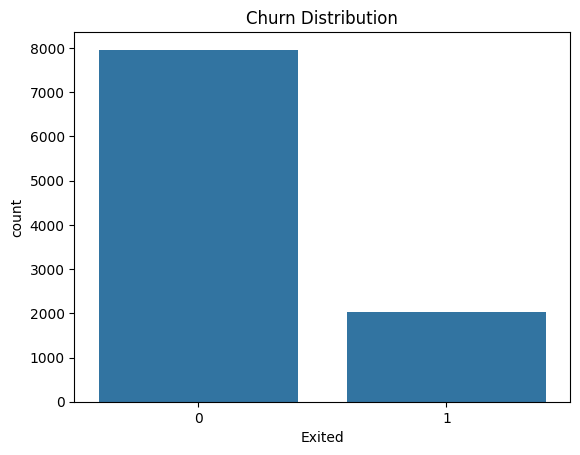

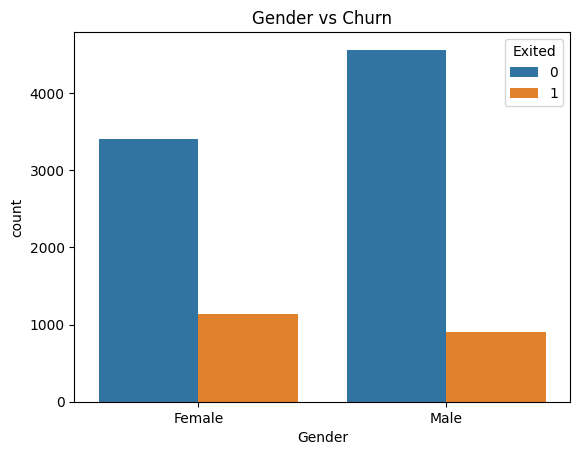

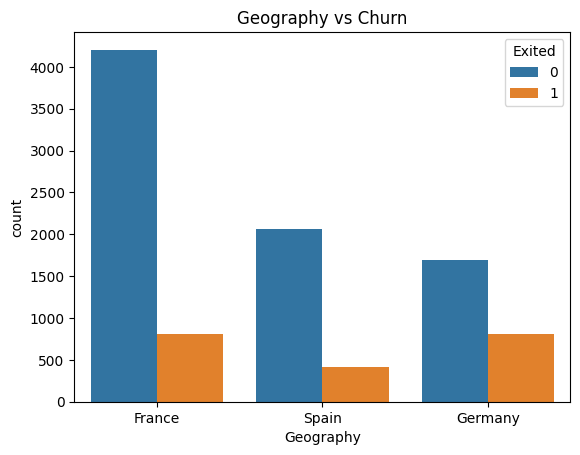

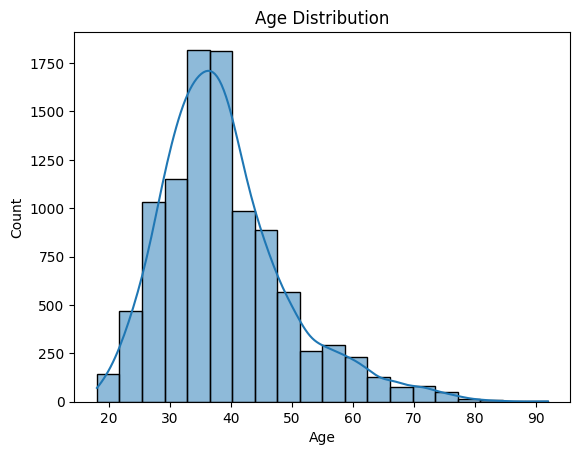


Logistic Regression Accuracy:
0.8155

Random Forest Accuracy:
0.864


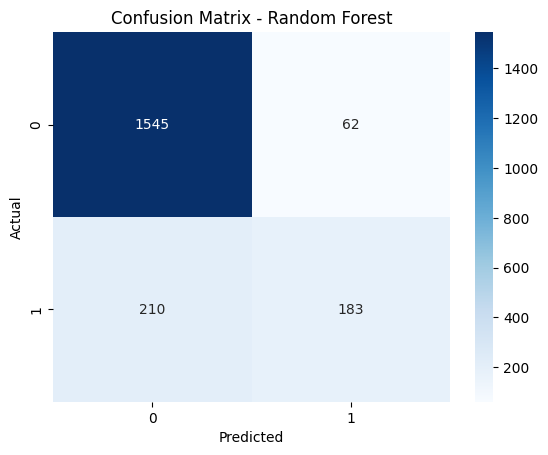


Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.96      0.92      1607
           1       0.75      0.47      0.57       393

    accuracy                           0.86      2000
   macro avg       0.81      0.71      0.75      2000
weighted avg       0.85      0.86      0.85      2000



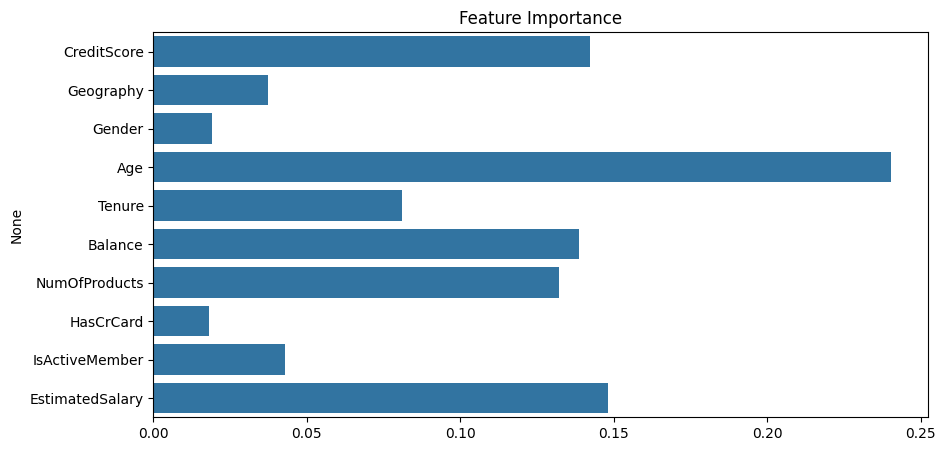

Customer Churn Prediction Model Completed Successfully


In [4]:
import pandas as pd

df = pd.read_csv('/content/churn.csv')
display(df.head())
# ================================
# CUSTOMER CHURN PREDICTION SYSTEM
# Dataset: Churn_Modelling.csv
# ================================

# 1. IMPORT LIBRARIES
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
df = pd.read_csv("churn.csv")
print(df.head())
print(df.info())
print(df.isnull().sum())
df.drop(["RowNumber", "CustomerId", "Surname"], axis=1, inplace=True)

# Churn count
plt.figure()
sns.countplot(x="Exited", data=df)
plt.title("Churn Distribution")
plt.show()

# Gender vs Churn
plt.figure()
sns.countplot(x="Gender", hue="Exited", data=df)
plt.title("Gender vs Churn")
plt.show()

# Geography vs Churn
plt.figure()
sns.countplot(x="Geography", hue="Exited", data=df)
plt.title("Geography vs Churn")
plt.show()

# Age distribution
plt.figure()
sns.histplot(df["Age"], bins=20, kde=True)
plt.title("Age Distribution")
plt.show()

le = LabelEncoder()
df["Gender"] = le.fit_transform(df["Gender"])
df["Geography"] = le.fit_transform(df["Geography"])

X = df.drop("Exited", axis=1)
y = df["Exited"]

scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)
lr = LogisticRegression()
lr.fit(X_train, y_train)
lr_pred = lr.predict(X_test)

print("\nLogistic Regression Accuracy:")
print(accuracy_score(y_test, lr_pred))
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

print("\nRandom Forest Accuracy:")
print(accuracy_score(y_test, rf_pred))
cm = confusion_matrix(y_test, rf_pred)

plt.figure()
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix - Random Forest")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()
print("\nClassification Report:")
print(classification_report(y_test, rf_pred))

feature_names = df.drop("Exited", axis=1).columns
importances = rf.feature_importances_

plt.figure(figsize=(10,5))
sns.barplot(x=importances, y=feature_names)
plt.title("Feature Importance")
plt.show()
print("Customer Churn Prediction Model Completed Successfully")


**CONCLUSION**

The customer churn prediction system developed in this project successfully identifies customers who are at risk of leaving the service. The results show that machine learning models, especially Random Forest, can effectively capture complex customer behavior patterns and provide accurate predictions. This system can help organizations reduce churn rates, improve customer satisfaction, and increase long-term profitability by enabling data-driven decision-making.